In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import cPickle as pickle
sys.path.insert(0,"../python/rrvf2017/")
import rrvf_model as rrvf
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


# Mean of models

In [93]:
def simple_mean(files):
    lst=[pd.read_csv(fname,index_col=0) for fname in files]
    df=0
    for u in lst:
        df=df+np.log1p(u)
    df=df/len(lst)
    df=np.expm1(df)
    return df

In [128]:
!ls ../submission/ -alrt|egrep "(l4|l3|l5)"|grep fold4 

-rw-rw-r--  1 bo bo  259479 Feb  4 23:38 l3_3000_ridge_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  413847 Feb  5 00:51 l3_3001_lgb_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259365 Feb  5 13:57 l3_3006_xgb_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337363 Feb  5 15:31 l3_3003_conv_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337354 Feb  6 01:57 l4_3003_conv_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259620 Feb  6 14:28 l4_3000_ridge_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  413880 Feb  6 14:28 l4_3001_lgb_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259570 Feb  6 14:28 l4_3006_xgb_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259563 Feb  6 14:28 l5_3000_ridge_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  413764 Feb  6 14:28 l5_3001_lgb_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259500 Feb  6 14:28 l5_3006_xgb_fold4_False_d478.csv.gz


In [145]:
!ls ../submission/ -alrt|egrep "(l4|l3|l5)"|grep mean |grep -v xgb_xgb|grep -v xgb_lgb|grep -v ridge99

-rw-rw-r--  1 bo bo  337236 Feb  4 23:39 l3_3000_ridge_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337074 Feb  5 00:52 l3_3001_lgb_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337007 Feb  5 13:57 l3_3006_xgb_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337033 Feb  5 15:48 l3_3003_conv_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337014 Feb  6 14:39 l5_3001_lgb_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337191 Feb  6 14:40 l5_3006_xgb_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  336746 Feb  6 14:54 l4_3001_lgb_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337049 Feb  6 14:55 l4_3006_xgb_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337435 Feb  6 14:57 l4_3003_conv_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337572 Feb  6 14:57 l4_3000_ridge_foldmean_False_d478.csv.gz


In [148]:
filenames

['l3_3000_ridge_foldmean_False_d478.csv.gz',
 'l3_3001_lgb_foldmean_False_d478.csv.gz',
 'l3_3003_conv_foldmean_False_d478.csv.gz',
 'l3_3006_xgb_foldmean_False_d478.csv.gz',
 'l4_3000_ridge_foldmean_False_d478.csv.gz',
 'l4_3001_lgb_foldmean_False_d478.csv.gz',
 'l4_3003_conv_foldmean_False_d478.csv.gz',
 'l4_3006_xgb_foldmean_False_d478.csv.gz',
 'l5_3001_lgb_foldmean_False_d478.csv.gz',
 'l5_3006_xgb_foldmean_False_d478.csv.gz']

In [146]:
name='l5_3000_ridge_fold{}_False_d478.csv.gz'  
files=['../submission/'+name.format(i) for i in range(5)]
u=simple_mean(files)
np.log1p(u.max().values),np.log1p(u.min().values)

(array([ 4.6601195]), array([ 0.59669478]))

In [144]:
u.to_csv("../submission/"+ name.format('mean'),compression='gzip')

In [111]:
files=[       u'l5_3001_lgb_foldmean_False_d478.csv.gz',
       u'l5_3006_xgb_foldmean_False_d478.csv.gz']
files=['../submission/'+ v for v in files]

u=simple_mean(files)
u.to_csv("../submission/l5_xgb_lgb_mean_False_d478.csv.gz",compression='gzip')
np.log1p(u.max())

visitors    4.623577
dtype: float64

In [126]:
files=[       u'l5_3001_lgb_foldmean_False_d478.csv.gz',
       u'l5_3006_xgb_foldmean_False_d478.csv.gz',
      'l5_3000_ridge_fold99_False_d478.csv.gz'
      ]
files=['../submission/'+ v for v in files]

u=simple_mean(files)
u.to_csv("../submission/l5_xgb_lgb_ridge99_mean_False_d478.csv.gz",compression='gzip')
np.log1p(u.max().values),np.log1p(u.min().values)

(array([ 4.60478291]), array([ 0.7558213]))

In [149]:
files=['l3_3000_ridge_foldmean_False_d478.csv.gz',
 'l3_3001_lgb_foldmean_False_d478.csv.gz',
 'l3_3003_conv_foldmean_False_d478.csv.gz',
 'l3_3006_xgb_foldmean_False_d478.csv.gz',
 'l4_3000_ridge_foldmean_False_d478.csv.gz',
 'l4_3001_lgb_foldmean_False_d478.csv.gz',
 'l4_3003_conv_foldmean_False_d478.csv.gz',
 'l4_3006_xgb_foldmean_False_d478.csv.gz',
 'l5_3001_lgb_foldmean_False_d478.csv.gz',
 'l5_3006_xgb_foldmean_False_d478.csv.gz']

In [152]:
for u in files:
    v=pd.read_csv("../submission/"+u,index_col=0).values
    print u,np.min(v),np.max(v)

l3_3000_ridge_foldmean_False_d478.csv.gz 0.549374452124 1072.95797499
l3_3001_lgb_foldmean_False_d478.csv.gz 1.25152080069 100.008976442
l3_3003_conv_foldmean_False_d478.csv.gz 1.34889698922 562.008987002
l3_3006_xgb_foldmean_False_d478.csv.gz 0.937977040112 107.577616201
l4_3000_ridge_foldmean_False_d478.csv.gz 0.795154616111 325.288420898
l4_3001_lgb_foldmean_False_d478.csv.gz 1.30651554588 99.6827138351
l4_3003_conv_foldmean_False_d478.csv.gz 1.22913899277 1152.57348603
l4_3006_xgb_foldmean_False_d478.csv.gz 1.12532307782 103.34687904
l5_3001_lgb_foldmean_False_d478.csv.gz 1.35668783144 99.5626621902
l5_3006_xgb_foldmean_False_d478.csv.gz 1.18818767735 103.103504719


In [154]:
lst=[]
for u in files:
    v=pd.read_csv("../submission/"+u,index_col=0) 
    lst.append(v)
    v=v.values
    print u,np.min(v),np.max(v)

l3_3000_ridge_foldmean_False_d478.csv.gz 0.549374452124 1072.95797499
l3_3001_lgb_foldmean_False_d478.csv.gz 1.25152080069 100.008976442
l3_3003_conv_foldmean_False_d478.csv.gz 1.34889698922 562.008987002
l3_3006_xgb_foldmean_False_d478.csv.gz 0.937977040112 107.577616201
l4_3000_ridge_foldmean_False_d478.csv.gz 0.795154616111 325.288420898
l4_3001_lgb_foldmean_False_d478.csv.gz 1.30651554588 99.6827138351
l4_3003_conv_foldmean_False_d478.csv.gz 1.22913899277 1152.57348603
l4_3006_xgb_foldmean_False_d478.csv.gz 1.12532307782 103.34687904
l5_3001_lgb_foldmean_False_d478.csv.gz 1.35668783144 99.5626621902
l5_3006_xgb_foldmean_False_d478.csv.gz 1.18818767735 103.103504719


In [156]:
sub=reduce(lambda u,v: u+v,lst)/len(lst)
sub.to_csv("../submission/l3_l4_l5_rawmean.csv.gz",compression='gzip')
np.log1p(sub.max().values),np.log1p(sub.min().values)

(array([ 5.84907179]), array([ 0.80702393]))

In [181]:
sub=0
for u in lst:
    sub = sub+np.log1p(u)
sub=np.expm1(sub/len(lst))
sub.to_csv("../submission/l3_l4_l5_mean.csv.gz",compression='gzip')
np.log1p(sub.max().values),np.log1p(sub.min().values)

(array([ 5.05731902]), array([ 0.79930921]))

In [6]:
for v in [0.485,0.48,0.475,0.47,0.465]:
    print v, np.sqrt(1-v**2/0.65241814)

0.485 0.799660355031
0.48 0.804271252278
0.475 0.808808489759
0.47 0.813273300315
0.465 0.817666870392


# weighted 

In [3]:
from multiprocessing import Pool

In [13]:
filenames=!ls *.pkl|grep fold4
filenames=[u.replace("fold4",'fold{}') for u in filenames]
filenames 

['l2_3000_ridge_fold{}_False_d478.pkl',
 'l2_3001_lgb_fold{}_False_d478.pkl',
 'l2_3003_conv_fold{}_False_d478.pkl',
 'l2_3006_xgb_fold{}_False_d478.pkl',
 'l3_3000_ridge_fold{}_False_d478.pkl',
 'l3_3001_lgb_fold{}_False_d478.pkl',
 'l3_3003_conv_fold{}_False_d478.pkl',
 'l3_3006_xgb_fold{}_False_d478.pkl',
 'l4_3000_ridge_fold{}_False_d478.pkl',
 'l4_3001_lgb_fold{}_False_d478.pkl',
 'l4_3003_conv_fold{}_False_d478.pkl',
 'l4_3006_xgb_fold{}_False_d478.pkl',
 'l5_3000_ridge_fold{}_False_d478.pkl',
 'l5_3001_lgb_fold{}_False_d478.pkl',
 'l5_3006_xgb_fold{}_False_d478.pkl']

In [14]:
N_FOLD=5

In [15]:
def f(fname):
    return [ pickle.load(open(fname.format(i))) for i in range(N_FOLD)]

In [16]:
p = Pool(4)

In [17]:
res=p.map(f, filenames)

In [18]:
pkldata=dict(zip(filenames,res))

In [19]:
#pkldata={fname: [ pickle.load(open(fname.format(i))) for i in range(5)] for fname in filenames}

In [20]:
p.close()

In [21]:
k="l5_3000_ridge_fold99_False_d478.pkl"
pkldata[k]=pickle.load(open(k))
k="l5_3000_ridge_fold99_True_d478.pkl"
pkldata[k]=pickle.load(open(k))

In [30]:
pkldata.keys()

['l5_3000_ridge_fold99_True_d478.pkl',
 'l5_3000_ridge_fold99_False_d478.pkl',
 'l5_3001_lgb_fold{}_False_d478.pkl',
 'l3_3006_xgb_fold{}_False_d478.pkl',
 'l5_3006_xgb_fold{}_False_d478.pkl',
 'l3_3000_ridge_fold{}_False_d478.pkl',
 'l4_3000_ridge_fold{}_False_d478.pkl',
 'l4_3003_conv_fold{}_False_d478.pkl',
 'l3_3003_conv_fold{}_False_d478.pkl',
 'l3_3001_lgb_fold{}_False_d478.pkl',
 'l4_3006_xgb_fold{}_False_d478.pkl',
 'l4_3001_lgb_fold{}_False_d478.pkl',
 'l5_3000_ridge_fold{}_False_d478.pkl']

In [23]:
def get_valid_data(fname,offset,fold,return_test=False):
    validpred,testpred=pkldata[fname][fold][offset]
    validdf=pd.DataFrame({"ytrue":np.squeeze(validpred[0]),fname:np.squeeze(validpred[2])},
                         index=[tuple(u) for u in validpred[1]])
    testdf=pd.DataFrame({ fname:np.squeeze(testpred[0])},index=  testpred[1]) if return_test else None
    return validdf,testdf

In [24]:
def get_valid_data2(fname,offset,return_test=False):
    validpred,testpred=pkldata[fname][offset]
    validdf=pd.DataFrame({"ytrue":np.squeeze(validpred[0]),fname:np.squeeze(validpred[2])},
                         index=[tuple(u) for u in validpred[1]])
    testdf=pd.DataFrame({ fname:np.squeeze(testpred[0])},index=  testpred[1]) if return_test else None
    return validdf,testdf

In [64]:
def show_valid(fold):
    d={}
    for fname in pkldata.keys():
        print fname
        if not '{}' in fname:
            continue
        d[fname]={}
        for offset in range(1,40):
            if '{}' in fname:
                validdf,_=get_valid_data(fname,offset,fold)
            else:
                continue
                #validdf,_=get_valid_data2(fname,offset)                
            ns=validdf.shape[0]
            validdf=validdf.dropna()
            if ns <> validdf.shape[0]:
                #print "Drop {} records for ".format(ns-validdf.shape[0]),fname,offset,fold
                pass
            score=mean_squared_error(validdf.values[:,0],validdf.values[:,1])
            d[fname][offset]=score
    return d

l5_3000_ridge_fold99_True_d478.pkl
l5_3000_ridge_fold99_False_d478.pkl
l5_3001_lgb_fold{}_False_d478.pkl
l3_3006_xgb_fold{}_False_d478.pkl
l5_3006_xgb_fold{}_False_d478.pkl
l3_3000_ridge_fold{}_False_d478.pkl
l4_3000_ridge_fold{}_False_d478.pkl
l4_3003_conv_fold{}_False_d478.pkl
l3_3003_conv_fold{}_False_d478.pkl
l3_3001_lgb_fold{}_False_d478.pkl
l4_3006_xgb_fold{}_False_d478.pkl
l4_3001_lgb_fold{}_False_d478.pkl
l5_3000_ridge_fold{}_False_d478.pkl
{0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold{}_False_d478.pkl', 9: 'l5_3001_lgb_fold{}_False_d478.pkl', 10: 'l5_3006_xgb_fold{}_False_d478.pkl'}


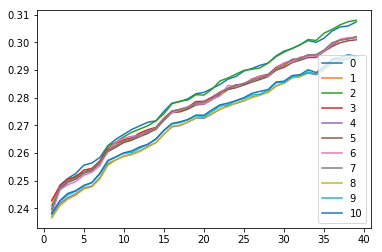

In [31]:
a=show_valid(0)
df=pd.DataFrame(a)
print dict([u for u in (enumerate(df.columns))])
df.columns=range(df.shape[1])
df.plot()

l5_3000_ridge_fold99_True_d478.pkl
l5_3000_ridge_fold99_False_d478.pkl
l5_3001_lgb_fold{}_False_d478.pkl
l3_3006_xgb_fold{}_False_d478.pkl
l5_3006_xgb_fold{}_False_d478.pkl
l3_3000_ridge_fold{}_False_d478.pkl
l4_3000_ridge_fold{}_False_d478.pkl
l4_3003_conv_fold{}_False_d478.pkl
l3_3003_conv_fold{}_False_d478.pkl
l3_3001_lgb_fold{}_False_d478.pkl
l4_3006_xgb_fold{}_False_d478.pkl
l4_3001_lgb_fold{}_False_d478.pkl
l5_3000_ridge_fold{}_False_d478.pkl
{0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold{}_False_d478.pkl', 9: 'l5_3001_lgb_fold{}_False_d478.pkl', 10: 'l5_3006_xgb_fold{}_False_d478.pkl'}


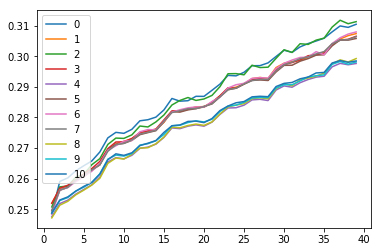

In [33]:
a=show_valid(1)
df=pd.DataFrame(a)
print dict([u for u in (enumerate(df.columns))])
df.columns=range(df.shape[1])
df.plot()

l5_3000_ridge_fold99_True_d478.pkl
l5_3000_ridge_fold99_False_d478.pkl
l5_3001_lgb_fold{}_False_d478.pkl
l3_3006_xgb_fold{}_False_d478.pkl
l5_3006_xgb_fold{}_False_d478.pkl
l3_3000_ridge_fold{}_False_d478.pkl
l4_3000_ridge_fold{}_False_d478.pkl
l4_3003_conv_fold{}_False_d478.pkl
l3_3003_conv_fold{}_False_d478.pkl
l3_3001_lgb_fold{}_False_d478.pkl
l4_3006_xgb_fold{}_False_d478.pkl
l4_3001_lgb_fold{}_False_d478.pkl
l5_3000_ridge_fold{}_False_d478.pkl
{0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold{}_False_d478.pkl', 9: 'l5_3001_lgb_fold{}_False_d478.pkl', 10: 'l5_3006_xgb_fold{}_False_d478.pkl'}


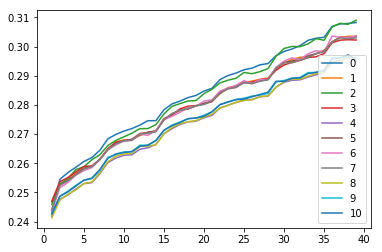

In [34]:
a=show_valid(2)
df=pd.DataFrame(a)
print dict([u for u in (enumerate(df.columns))])
df.columns=range(df.shape[1])
df.plot()

l5_3000_ridge_fold99_True_d478.pkl
l5_3000_ridge_fold99_False_d478.pkl
l5_3001_lgb_fold{}_False_d478.pkl
l3_3006_xgb_fold{}_False_d478.pkl
l5_3006_xgb_fold{}_False_d478.pkl
l3_3000_ridge_fold{}_False_d478.pkl
l4_3000_ridge_fold{}_False_d478.pkl
l4_3003_conv_fold{}_False_d478.pkl
l3_3003_conv_fold{}_False_d478.pkl
l3_3001_lgb_fold{}_False_d478.pkl
l4_3006_xgb_fold{}_False_d478.pkl
l4_3001_lgb_fold{}_False_d478.pkl
l5_3000_ridge_fold{}_False_d478.pkl
{0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold{}_False_d478.pkl', 9: 'l5_3001_lgb_fold{}_False_d478.pkl', 10: 'l5_3006_xgb_fold{}_False_d478.pkl'}


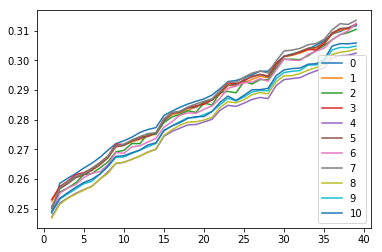

In [35]:
a=show_valid(3)
df=pd.DataFrame(a)
print dict([u for u in (enumerate(df.columns))])
df.columns=range(df.shape[1])
df.plot()

l5_3000_ridge_fold99_True_d478.pkl
l5_3000_ridge_fold99_False_d478.pkl
l5_3001_lgb_fold{}_False_d478.pkl
l3_3006_xgb_fold{}_False_d478.pkl
l5_3006_xgb_fold{}_False_d478.pkl
l3_3000_ridge_fold{}_False_d478.pkl
l4_3000_ridge_fold{}_False_d478.pkl
l4_3003_conv_fold{}_False_d478.pkl
l3_3003_conv_fold{}_False_d478.pkl
l3_3001_lgb_fold{}_False_d478.pkl
l4_3006_xgb_fold{}_False_d478.pkl
l4_3001_lgb_fold{}_False_d478.pkl
l5_3000_ridge_fold{}_False_d478.pkl
{0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold{}_False_d478.pkl', 9: 'l5_3001_lgb_fold{}_False_d478.pkl', 10: 'l5_3006_xgb_fold{}_False_d478.pkl'}


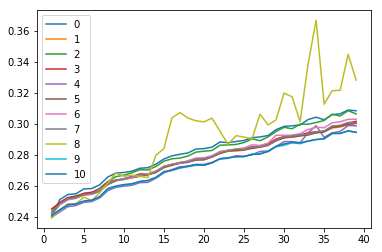

In [65]:
ab=show_valid(4)
df=pd.DataFrame(ab)
print dict([u for u in (enumerate(df.columns))])
df.columns=range(df.shape[1])
df.plot()

In [74]:
df=pd.DataFrame(ab)
df.iloc[-2].sort_values()

l5_3001_lgb_fold{}_False_d478.pkl      0.295183
l5_3006_xgb_fold{}_False_d478.pkl      0.295475
l4_3000_ridge_fold{}_False_d478.pkl    0.298795
l3_3001_lgb_fold{}_False_d478.pkl      0.299319
l4_3001_lgb_fold{}_False_d478.pkl      0.299582
l3_3006_xgb_fold{}_False_d478.pkl      0.300531
l4_3006_xgb_fold{}_False_d478.pkl      0.300809
l4_3003_conv_fold{}_False_d478.pkl     0.302837
l3_3003_conv_fold{}_False_d478.pkl     0.308399
l3_3000_ridge_fold{}_False_d478.pkl    0.308825
l5_3000_ridge_fold{}_False_d478.pkl    0.344716
Name: 38, dtype: float64

7    0.295183
8    0.295475
1    0.299319
4    0.299582
3    0.300531
6    0.300809
5    0.302837
2    0.308399
0    0.308825
Name: 38, dtype: float64

{0: 'l5_3001_lgb_fold{}_False_d478.pkl', 1: 'l5_3006_xgb_fold{}_False_d478.pkl'}


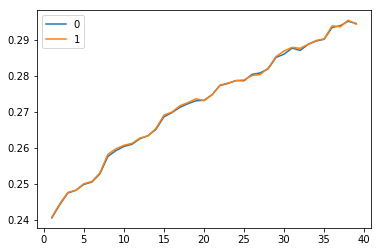

In [83]:
df=pd.DataFrame(ab)[[
       #u'l3_3001_lgb_fold{}_False_d478.pkl',
       #u'l3_3006_xgb_fold{}_False_d478.pkl',
       #u'l4_3001_lgb_fold{}_False_d478.pkl',
       #u'l4_3003_conv_fold{}_False_d478.pkl',
       #u'l4_3006_xgb_fold{}_False_d478.pkl',
       u'l5_3001_lgb_fold{}_False_d478.pkl',
       u'l5_3006_xgb_fold{}_False_d478.pkl']]
print dict([u for u in (enumerate(df.columns))])
df.columns=range(df.shape[1])
df.plot()

In [37]:
def get_data_wo_fold():
    d={}
    for fname in pkldata.keys():
        d[fname]={}
        for offset in range(1,40):
            if '{}' in fname:
                lst1=[];lst2=[]
                for fold in range(N_FOLD):
                    validdf,testdf=get_valid_data(fname,offset,fold,return_test=True)
                    lst1.append(validdf)
                    lst2.append(testdf)
                validdf=pd.concat(lst1)
                testdf=pd.concat(lst2)
            else:
                validdf,testdf=get_valid_data2(fname,offset,return_test=True)
            if np.random.random()<0.2:
                print fname,offset,validdf.shape, validdf.dropna().shape, testdf.shape
            d[fname][offset]=[validdf.dropna(),testdf]
    return d
pkdata_wo_fold=get_data_wo_fold()

l5_3000_ridge_fold99_True_d478.pkl 4 (250028, 2) (250028, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 13 (247695, 2) (247695, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 14 (247417, 2) (247417, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 17 (246636, 2) (246636, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 18 (246400, 2) (246400, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 21 (245580, 2) (245580, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 22 (245292, 2) (245292, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 29 (243443, 2) (243443, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 34 (242159, 2) (242159, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 35 (241895, 2) (241895, 2) (829, 1)
l5_3000_ridge_fold99_True_d478.pkl 38 (241104, 2) (241104, 2) (829, 1)
l5_3000_ridge_fold99_False_d478.pkl 1 (250740, 2) (250740, 2) (829, 1)
l5_3000_ridge_fold99_False_d478.pkl 3 (250230, 2) (250230, 2) (829, 1)
l5_3000_ridge_fold99_False_d478.pkl 8 (248949, 2) (248949, 2) (829, 1)
l5_3000

In [38]:
lst=[]
for fname in pkdata_wo_fold:
    print fname,
    lst.append([pkdata_wo_fold[fname][offset][0].mean().values for offset in range(1,40)])

l5_3000_ridge_fold99_True_d478.pkl l4_3001_lgb_fold{}_False_d478.pkl l5_3001_lgb_fold{}_False_d478.pkl l3_3006_xgb_fold{}_False_d478.pkl l3_3000_ridge_fold{}_False_d478.pkl l4_3000_ridge_fold{}_False_d478.pkl l4_3003_conv_fold{}_False_d478.pkl l3_3003_conv_fold{}_False_d478.pkl l5_3000_ridge_fold{}_False_d478.pkl l3_3001_lgb_fold{}_False_d478.pkl l4_3006_xgb_fold{}_False_d478.pkl l5_3000_ridge_fold99_False_d478.pkl l5_3006_xgb_fold{}_False_d478.pkl


In [39]:
filename='l5_3000_ridge_fold{}_False_d478.pkl'
offset=34
for i in range(5):
    print i, mean_squared_error(pkldata[filename][i][offset][0][0],
                       pkldata[filename][i][offset][0][2])  

0 0.288483
1 0.293473
2 0.290732
3 0.297543
4 0.366718


In [40]:
mean_squared_error(pkdata_wo_fold[filename][offset][0].values[:,0],
                   pkdata_wo_fold[filename][offset][0].values[:,1])  

0.30719829

In [41]:
pkdata_wo_fold['l5_3000_ridge_fold{}_False_d478.pkl'][39][0].corr()

l5_3000_ridge_fold{}_False_d478.pkl  \
l5_3000_ridge_fold{}_False_d478.pkl                             1.000000   
ytrue                                                           0.731502   

                                        ytrue  
l5_3000_ridge_fold{}_False_d478.pkl  0.731502  
ytrue                                1.000000

In [42]:
def MSE(y,ypred):
    ind= (~np.isnan(y)) & (~np.isnan(ypred))
    y=y[ind].astype(np.float)
    ypred=ypred[ind].astype(np.float)
    return mean_squared_error(y,ypred)
def make_l2_features_by_model(filename, pkdata_wo_fold,offset):
    lst1=[];lst2=[]
    for fold in range(5):
        validdf,testdf=get_valid_data(filename,offset,fold,return_test=True)
        lst1.append(validdf)
        lst2.append(testdf)
    valid=pd.concat(lst1)
    #print valid.columns
    y=valid['ytrue'].values
    valid=valid.drop('ytrue',axis=1)
    print filename, MSE(y,valid.iloc[:,0].values)
    test=reduce(lambda u,v: u+v,lst2)/len(lst2)
    test['idx']=test.index.map(lambda u: tuple([u,478]))
    test=test.set_index('idx')
    total=pd.concat([valid,test])
    arr=np.zeros([829,517],dtype=np.float32)*np.nan
    #print total.index
    index=total.index.map(lambda u: tuple([u[0],u[1]+offset-1]))
    arr[zip(*index)]=total.iloc[:,0].values
    return arr
def make_l2_features(pkdata_wo_fold,offset):
    cols=list(pkdata_wo_fold.keys())
    lst=[]
    for col in cols:
        arr=make_l2_features_by_model(col,pkdata_wo_fold,offset)
        lst.append(arr)
    return cols, np.array(lst)


In [43]:
def show_valid():
    d={}
    for fname in pkdata_wo_fold.keys():
        print fname
        d[fname]={}
        for offset in range(1,40):
            validdf,_=pkdata_wo_fold[fname][offset]
            ns=validdf.shape[0]
            validdf=validdf.dropna()
            if ns <> validdf.shape[0]:
                print "Drop {} records for ".format(ns-validdf.shape[0]),fname,offset,fold
                pass
            score=mean_squared_error(validdf.values[:,0],validdf.values[:,1])
            d[fname][offset]=score
    return d

l5_3000_ridge_fold99_True_d478.pkl
l4_3001_lgb_fold{}_False_d478.pkl
l5_3001_lgb_fold{}_False_d478.pkl
l3_3006_xgb_fold{}_False_d478.pkl
l3_3000_ridge_fold{}_False_d478.pkl
l4_3000_ridge_fold{}_False_d478.pkl
l4_3003_conv_fold{}_False_d478.pkl
l3_3003_conv_fold{}_False_d478.pkl
l5_3000_ridge_fold{}_False_d478.pkl
l3_3001_lgb_fold{}_False_d478.pkl
l4_3006_xgb_fold{}_False_d478.pkl
l5_3000_ridge_fold99_False_d478.pkl
l5_3006_xgb_fold{}_False_d478.pkl
{0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold99_False_d478.pkl', 9: 'l5_3000_ridge_fold99_True_d478.pkl', 10: 'l5_3000_ridge_fold{}_False_d478.pkl', 11: 'l5_3001_lgb_fold{}_False_d478.pkl', 12: 'l5_3006_xgb_fold{}_False_d478.pkl'}


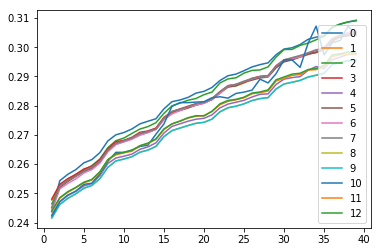

In [44]:
aa=show_valid()
df=pd.DataFrame(aa)
print dict([u for u in (enumerate(df.columns))])
df.columns=range(df.shape[1])
df.plot()

In [84]:
df=pd.DataFrame(aa)

In [46]:
df.columns 

Index([u'l3_3000_ridge_fold{}_False_d478.pkl',
       u'l3_3001_lgb_fold{}_False_d478.pkl',
       u'l3_3003_conv_fold{}_False_d478.pkl',
       u'l3_3006_xgb_fold{}_False_d478.pkl',
       u'l4_3000_ridge_fold{}_False_d478.pkl',
       u'l4_3001_lgb_fold{}_False_d478.pkl',
       u'l4_3003_conv_fold{}_False_d478.pkl',
       u'l4_3006_xgb_fold{}_False_d478.pkl',
       u'l5_3000_ridge_fold99_False_d478.pkl',
       u'l5_3000_ridge_fold99_True_d478.pkl',
       u'l5_3000_ridge_fold{}_False_d478.pkl',
       u'l5_3001_lgb_fold{}_False_d478.pkl',
       u'l5_3006_xgb_fold{}_False_d478.pkl'],
      dtype='object')

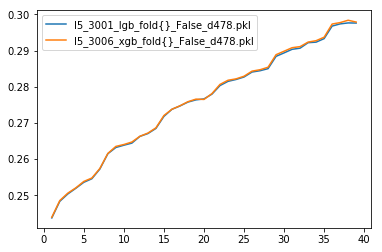

In [90]:
df[[ 
       #u'l4_3000_ridge_fold{}_False_d478.pkl',
       #u'l5_3000_ridge_fold99_False_d478.pkl',
       #u'l5_3000_ridge_fold99_True_d478.pkl',
       u'l5_3001_lgb_fold{}_False_d478.pkl',
       u'l5_3006_xgb_fold{}_False_d478.pkl'
]].plot()

In [48]:
def get_valid_pred(offset):
    lst=[]
    for fname in pkdata_wo_fold:
        s=pkdata_wo_fold[fname][offset][0]
        lst.append(s)
    df=pd.concat(lst,axis=1)
    return df

In [49]:
def evaluate(offset):
    a=get_valid_pred(offset)
    a=a.dropna()
    X=a[[u for u in a.columns if u<>'ytrue']].values
    y=a['ytrue'].iloc[:,0].values
    W=rrvf.make_weights(X.T,y,np.ones_like(y))
    return dict(zip([u for u in a.columns if u<>'ytrue'],W))


In [50]:
lst={}
for offset in range(1,40):
    print offset
    lst[offset]=evaluate(offset)

1
individual loss [ 0.24036295  0.24376365  0.242483    0.2466833   0.24243105  0.24134438
  0.24397872  0.24640417  0.24099331  0.24638769  0.24392384  0.24036563
  0.24264636]
[  9.57513579e-01  -1.15069329e-16  -1.20466329e-16   3.55261239e-17
   1.33747364e-16  -3.27420608e-16   3.54438627e-02   7.04255830e-03
  -1.95092616e-15   9.04714060e-17   5.99505475e-17  -6.24512600e-15
   0.00000000e+00] 0.240355821337
2
individual loss [ 0.24497937  0.25076055  0.24707922  0.2518758   0.25296228  0.2459994
  0.25153923  0.2523411   0.24579488  0.25132361  0.25106554  0.24497824
  0.24726793]
[  4.66777366e-15   1.64113638e-17   0.00000000e+00  -1.13052878e-17
   4.63133947e-18   2.42061848e-16   2.82111797e-02   2.21614909e-02
  -5.76829457e-16   2.49697812e-17  -2.47774089e-17   9.25763502e-01
   2.38638276e-02] 0.244953622733
3
individual loss [ 0.24709661  0.25279588  0.24914354  0.25377751  0.25521344  0.24797022
  0.25340583  0.25429452  0.24813768  0.25327773  0.25308012  0.24709089

individual loss [ 0.274759    0.28129147  0.27726434  0.28165632  0.28547221  0.27605405
  0.28208281  0.28464363  0.28202275  0.2814566   0.2815257   0.2747613
  0.27743994]
[  9.61383678e-01   1.11310075e-16  -5.36016335e-18  -1.28472033e-16
   2.36767352e-19   2.27508843e-16   1.68845268e-19   0.00000000e+00
   4.04839192e-17   6.21805058e-18   4.77490384e-17  -3.10988636e-14
   3.86163222e-02] 0.274754668147
22
individual loss [ 0.27712203  0.28361464  0.27951011  0.28397982  0.28769942  0.27835631
  0.28428089  0.28777883  0.2820499   0.28342633  0.28401319  0.27712358
  0.279848  ]
[  9.62701083e-01   5.82349349e-17  -1.28302881e-17  -1.79576935e-17
  -3.50086341e-18   6.89342883e-16   3.06794908e-19   0.00000000e+00
   3.58370003e-17  -2.26882445e-18  -6.78535983e-18   1.63410422e-14
   3.72989169e-02] 0.277117930378
23
individual loss [ 0.27861907  0.28557623  0.28077405  0.28609319  0.28937505  0.27968907
  0.28666135  0.28914782  0.28176178  0.28572809  0.28590751  0.27861021

{0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold99_False_d478.pkl', 9: 'l5_3000_ridge_fold99_True_d478.pkl', 10: 'l5_3000_ridge_fold{}_False_d478.pkl', 11: 'l5_3001_lgb_fold{}_False_d478.pkl', 12: 'l5_3006_xgb_fold{}_False_d478.pkl'}


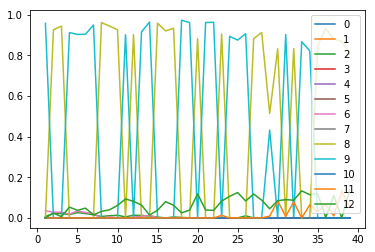

In [51]:
df=pd.DataFrame(lst).T
print dict(enumerate(df.columns))
df.columns=range(df.shape[1])
df.plot()

In [54]:
df[df<0.001]=np.nan

In [60]:
tmp={0: 'l3_3000_ridge_fold{}_False_d478.pkl', 1: 'l3_3001_lgb_fold{}_False_d478.pkl', 2: 'l3_3003_conv_fold{}_False_d478.pkl', 3: 'l3_3006_xgb_fold{}_False_d478.pkl', 4: 'l4_3000_ridge_fold{}_False_d478.pkl', 5: 'l4_3001_lgb_fold{}_False_d478.pkl', 6: 'l4_3003_conv_fold{}_False_d478.pkl', 7: 'l4_3006_xgb_fold{}_False_d478.pkl', 8: 'l5_3000_ridge_fold99_False_d478.pkl', 9: 'l5_3000_ridge_fold99_True_d478.pkl', 10: 'l5_3000_ridge_fold{}_False_d478.pkl', 11: 'l5_3001_lgb_fold{}_False_d478.pkl', 12: 'l5_3006_xgb_fold{}_False_d478.pkl'}
tmp=np.array(tmp.values())
tmp[df.isnull().mean()<1]

array(['l3_3003_conv_fold{}_False_d478.pkl',
       'l4_3003_conv_fold{}_False_d478.pkl',
       'l5_3000_ridge_fold99_False_d478.pkl',
       'l5_3000_ridge_fold99_True_d478.pkl',
       'l5_3001_lgb_fold{}_False_d478.pkl',
       'l5_3006_xgb_fold{}_False_d478.pkl'],
      dtype='|S35')

{0: 'l3_3003_conv_fold{}_False_d478.pkl', 1: 'l4_3003_conv_fold{}_False_d478.pkl', 2: 'l5_3000_ridge_fold99_False_d478.pkl', 3: 'l5_3000_ridge_fold99_True_d478.pkl', 4: 'l5_3001_lgb_fold{}_False_d478.pkl', 5: 'l5_3006_xgb_fold{}_False_d478.pkl'}


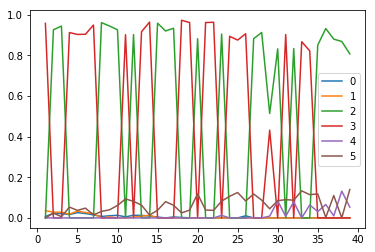

In [62]:
df=pd.DataFrame(lst).T[['l3_3003_conv_fold{}_False_d478.pkl',
       'l4_3003_conv_fold{}_False_d478.pkl',
       'l5_3000_ridge_fold99_False_d478.pkl',
       'l5_3000_ridge_fold99_True_d478.pkl',
       'l5_3001_lgb_fold{}_False_d478.pkl',
       'l5_3006_xgb_fold{}_False_d478.pkl']]
print dict(enumerate(df.columns))
df.columns=range(df.shape[1])
df.plot()